In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [2]:
training = pd.read_csv('data1.csv')
training = training.drop('Unnamed: 0', axis=1)

In [3]:
training.columns

Index(['motion_sensor1', 'motion_sensor2', 'motion_sensor3', 'motion_sensor4',
       'motion_sensor5', 'motion_sensor6', 'camera1', 'camera2', 'camera3',
       'camera4', 'robot1', 'robot2', 'door_sensor1', 'door_sensor2',
       'door_sensor3', 'door_sensor4', 'time', 'r1', 'r2', 'r3', 'r4', 'r5',
       'r6', 'r7', 'r8', 'r9', 'r10', 'r11', 'r12', 'r13', 'r14', 'r15', 'r16',
       'r17', 'r18', 'r19', 'r20', 'r21', 'r22', 'r23', 'r24', 'r25', 'r26',
       'r27', 'r28', 'r29', 'r30', 'r31', 'r32', 'r33', 'r34', 'c1', 'c2',
       'outside'],
      dtype='object')

In [4]:
np.sum(training['r1'])

np.int64(3075)

In [5]:
total_inside = (training.iloc[:,17:-1]).sum(axis=1)


In [6]:
#time = datetime.strptime(training['time'], '%H::%M::%S').time()

seconds_of_day = []
for time_str in training['time']:
    time = datetime.strptime(time_str, '%H:%M:%S').time()
    seconds_of_day.append((time.hour*60+time.minute)*60+time.second)

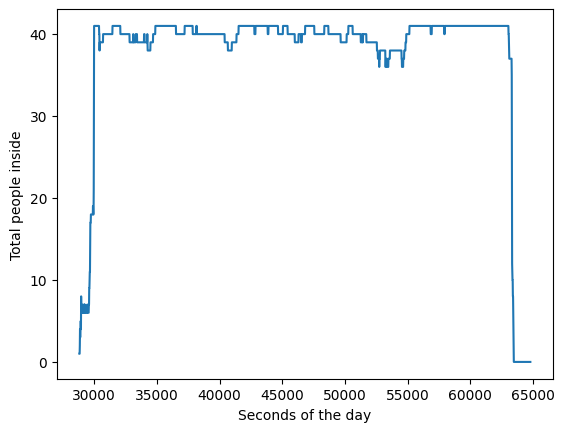

In [7]:
plt.plot(seconds_of_day, total_inside)
plt.xlabel("Seconds of the day")
plt.ylabel("Total people inside")

plt.show()

In [10]:
# training['total_people']= training[1]

In [11]:
((training['door_sensor1']>0)&(training['r2']>0)).sum()

np.int64(155)

In [12]:
((training['door_sensor1']>0)&(training['r1']>0)).sum()

np.int64(168)

In [13]:
((training['door_sensor1']>0)&(training['r12']>0)).sum()

np.int64(155)

In [14]:
((training['door_sensor1']>0)&(training['r34']>0)).sum()

np.int64(129)

In [15]:
(training['door_sensor1']>0).sum()

np.int64(222)

In [16]:
print((training['r2']>0).sum())
print((training['r3']>0).sum())

1087
1386


In [17]:
((training['door_sensor1']>0)&(training['r3']>0)).sum()

np.int64(186)

In [18]:
(training['r3']==1).sum()

np.int64(563)

In [19]:
r3_forwardStep = training['r3'][1:]
r3_forwardStep[2400]=0

In [20]:
training_forward = training.shift(1)

In [21]:
((training_forward['r2']==1)&(training['r2']==0)).sum()

np.int64(100)

In [22]:
((training_forward['r2']==1)&(training['r2']==0)&(training['door_sensor1']>0)).sum()

np.int64(60)

In [23]:
((training['r1']>0)&(training['motion_sensor1']=='motion')).sum()/(training['r1']>0).sum()

np.float64(0.9494479953515398)

# Looking at rooms 4,5 and 6

Rooms 4,5 and 6 have no sensors and are all connected. Should we just treat them basically as one room for this? Is there any interesting interactions?

In [24]:
def prob_from_room_to_room(original_room, next_room):
    print(((training_forward[next_room]>0)&(training[original_room]>0)).sum()/((training[original_room]>0).sum()))

In [25]:
prob_from_room_to_room('r6', 'r4')

0.05272952853598015


In [26]:
prob_from_room_to_room('r4', 'r6')

0.9139784946236559


In [27]:
prob_from_room_to_room('r5', 'r6')

0.8329718004338394


In [28]:
prob_from_room_to_room('r6', 'r5')

0.23883374689826303


Seems high probabilities in there - let's check out some other interactions:

In [29]:
prob_from_room_to_room('r12', 'r3')
prob_from_room_to_room('r3', 'r12')

0.5992292870905588
0.670995670995671


In [30]:
prob_from_room_to_room('r1', 'r2')
prob_from_room_to_room('r2', 'r1')

0.5101685066821615
0.8068077276908924


We can also look at staying in a room with this code

In [31]:
prob_from_room_to_room('r2', 'r2')
prob_from_room_to_room('r1', 'r1')
prob_from_room_to_room('r4', 'r4')

0.9043238270469182
0.9907030796048809
0.7741935483870968


In [32]:
cols = training.iloc[:, 17:56].columns
for name in cols:
    print('staying in '+name)
    prob_from_room_to_room(name,name)

staying in r1
0.9907030796048809
staying in r2
0.9043238270469182
staying in r3
0.9451659451659452
staying in r4
0.7741935483870968
staying in r5
0.9522776572668112
staying in r6
0.9851116625310173
staying in r7
0.9901417128773875
staying in r8
0.9649122807017544
staying in r9
0.9889415481832543
staying in r10
0.9919236417033774
staying in r11
0.991869918699187
staying in r12
0.9576107899807321
staying in r13
0.9916617033948779
staying in r14
0.7972222222222223
staying in r15
0.9936260623229461
staying in r16
0.9986589181940099
staying in r17
0.9888751545117429
staying in r18
0.9908508691674291
staying in r19
0.9806451612903225
staying in r20
0.7327102803738318
staying in r21
0.9882253994953742
staying in r22
0.6666666666666666
staying in r23
0.9926220204313281
staying in r24
0.978494623655914
staying in r25
0.9700765483646486
staying in r26
0.9642445213379469
staying in r27
0.27790432801822323
staying in r28
0.5286343612334802
staying in r29
0.9653815892997639
staying in r30
0.9278717

In [33]:
prob_from_room_to_room('r1','r3')
prob_from_room_to_room('r3','r1')

0.642068564787914
0.7922077922077922


This next one is almost a kappa test - if these probabilities are just high because people are usually in rooms. R1 and R25 are very far apart

In [34]:
prob_from_room_to_room('r25','r1')

0.8183716075156576


We can see that the probability of someone being in room 25 after having been in room1 is very high - so maybe this kind of connection is pretty random?

# prob staying 0

In [35]:
def prob0_from_room_to_room(original_room, next_room):
    print(((training_forward[next_room]==0)&(training[original_room]==0)).sum()/((training[original_room]==0).sum()))

cols = training.iloc[:, 17:56].columns
for name in cols:
    print('noone still in '+name)
    prob0_from_room_to_room(name,name)

noone still in r1
0.9749631811487481
noone still in r2
0.92003046458492
noone still in r3
0.9240631163708086
noone still in r4
0.9904638058084092
noone still in r5
0.9881382155750387
noone still in r6
0.9682741116751269
noone still in r7
0.9781209781209781
noone still in r8
0.992503748125937
noone still in r9
0.9867724867724867
noone still in r10
0.9884393063583815
noone still in r11
0.9905982905982906
noone still in r12
0.9205219454329775
noone still in r13
0.9791955617198336
noone still in r14
0.9125
noone still in r15
0.9898785425101214
noone still in r16
0.9754601226993865
noone still in r17
0.9937146448774355
noone still in r18
0.991583779648049
noone still in r19
0.9870748299319728
noone still in r20
0.9227882037533512
noone still in r21
0.9876135425268373
noone still in r22
0.9540066382171646
noone still in r23
0.9780564263322884
noone still in r24
0.9832970225127088
noone still in r25
0.9543094496365524
noone still in r26
0.9054054054054054
noone still in r27
0.8378378378378378

# Checking accuracy of all sensors

In [36]:
def check_accuracy_motion(room, motion_sensor):
    print(((training[room]>0)&(training[motion_sensor]=='motion')).sum()/(training[room]>0).sum())


room_nums = [1,14,19,28,29,32]

for i in range(0,6):
    room = 'r'+str(room_nums[i])
    motions = 'motion_sensor'+str(i+1)
    check_accuracy_motion(room,motions)



0.9494479953515398
0.925
0.9172043010752688
0.9251101321585903
0.946498819826908
0.9859913793103449


In [37]:
def check0_accuracy_motion(room, motion_sensor):
    print(((training[room]==0)&(training[motion_sensor]=='no motion')).sum()/(training[room]==0).sum())


room_nums = [1,14,19,28,29,32]

for i in range(0,6):
    room = 'r'+str(room_nums[i])
    motions = 'motion_sensor'+str(i+1)
    check0_accuracy_motion(room,motions)


0.8409425625920471
0.8523809523809524
0.9013605442176871
0.8656235618959963
0.8839681133746679
0.8511029411764706


In [38]:
def check_acc_camera(room, camera):
    print('binary acc:', ((training[room]>0)&(training[camera]>0)).sum()/(training[room]>0).sum())
    print('exact acc:',((training[room]==training[camera]).sum()/(training.shape[0])))
    print('exact acc if someones in:',((((training[room]>0)&(training[room]==training[camera])).sum()/(training[room]>0).sum())))
    print('acc of 0s:',((training[room]==0)&(training[camera]==0)).sum()/(training[room]==0).sum())

    print('\n')

room_nums = [3,21,25,34]
for i in range(0,4):
    room = 'r'+str(room_nums[i])
    camera = 'camera'+str(i+1)
    check_acc_camera(room,camera)

binary acc: 0.974025974025974
exact acc: 0.96625
exact acc if someones in: 0.9415584415584416
acc of 0s: 1.0


binary acc: 0.9671993271656855
exact acc: 0.9783333333333334
exact acc if someones in: 0.9562657695542472
acc of 0s: 1.0


binary acc: 0.9832985386221295
exact acc: 0.975
exact acc if someones in: 0.9582463465553236
acc of 0s: 1.0


binary acc: 0.9635593220338983
exact acc: 0.9733333333333334
exact acc if someones in: 0.9457627118644067
acc of 0s: 1.0




In [39]:
training['robot1'][0]

"('r5', 0)"

In [40]:
txt = "('r56', 78)"
re.search("(?<=')\w+", txt).group()

'r56'

In [41]:
training['r1'][1]

np.int64(0)

In [47]:
def extract_tuple(robot):
    room = re.search("(?<=')\w+", robot).group()
    count = re.search("(?<=\s)\d+", robot).group()
    return room, count

robot1 = training['robot1']
robot2 = training['robot2']
rob1_acc = 0
rob2_acc = 0
for i in range(0,len(robot1)):
    rob1 = robot1[i]
    rob2 = robot2[i]
    room_rob1 = re.search("(?<=')\w+", rob1).group()
    room_rob2 = re.search("(?<=')\w+", rob2).group()
    count_rob1 = re.search("(?<=\s)\d+", rob1).group()
    count_rob2 = re.search("(?<=\s)\d+", rob2).group()
    if (training[room_rob1][i]==int(count_rob1)):
        rob1_acc+=1
    if training[room_rob2][i]==int(count_rob2):
        rob2_acc+=1

training['robot1'].apply(extract_tuple)

0        (r5, 0)
1        (r6, 0)
2       (r14, 0)
3        (r6, 0)
4        (r6, 0)
          ...   
2395    (r20, 0)
2396    (r20, 0)
2397    (r26, 0)
2398    (r27, 0)
2399     (c1, 0)
Name: robot1, Length: 2400, dtype: object

In [43]:
rob2_acc

2400